# Circuit VS_CS_R4

In [1]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts

## DPsim EMT

In [2]:
# DPsim EMT simulation
import dpsim

name = 'EMT_VS_CS_R4_AC'

# Nodes
gnd = dpsim.emt.Node.GND()
n1 = dpsim.emt.Node('n1')
n2 = dpsim.emt.Node('n2')
n3 = dpsim.emt.Node('n3')

# Components
vs = dpsim.emt.ph1.VoltageSource('vs')
vs.V_ref = complex(10,0)
vs.f_src = 50
r1 = dpsim.emt.ph1.Resistor('r1')
r1.R = 1
r2 = dpsim.emt.ph1.Resistor('r2')
r2.R = 1
r3 = dpsim.emt.ph1.Resistor('r3')
r3.R = 10
r4 = dpsim.emt.ph1.Resistor('r4')
r4.R = 5
cs = dpsim.emt.ph1.CurrentSource('cs')
cs.I_ref = complex(1,0)
cs.f_src = 50

vs.connect([gnd, n1])
r1.connect([n1, n2])
r2.connect([n2, gnd])
r3.connect([n2, n3])
r4.connect([n3, gnd])
cs.connect([gnd, n3])

system = dpsim.SystemTopology(50, [gnd, n1, n2, n3], [vs, r1, r2, r3, r4, cs])

logger = dpsim.Logger(name)
logger.log_attribute(n1, 'v');
logger.log_attribute(n2, 'v');
logger.log_attribute(n3, 'v');
logger.log_attribute(r1, 'i_intf');
logger.log_attribute(r3, 'i_intf');

sim = dpsim.Simulation(name, system, timestep=0.0001, duration=0.1, pbar=True, sim_type=1)
sim.add_logger(logger)

await sim.simulate()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

In [3]:
# read EMT results
#work_dir = '../../dpsim/Logs/'
work_dir = 'Logs/'
log_name = 'EMT_VS_CS_R4_AC'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

Logs/EMT_VS_CS_R4_AC.csv
column number: 5
results length: 1000
real column names: ['n1.v', 'n2.v', 'n3.v', 'r1.i_intf', 'r3.i_intf']
complex column names: []


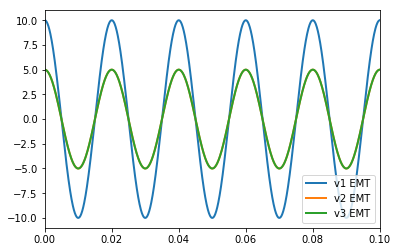

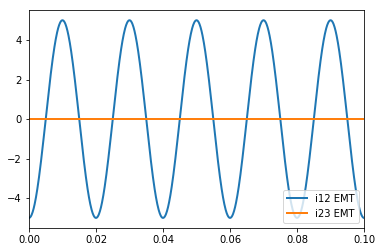

In [4]:
#v1 = 'v1'
#v2 = 'v2'
#v3 = 'v3'
#i12 = 'i12'
#i23 = 'i23'
v1 = 'n1.v'
v2 = 'n2.v'
v3 = 'n3.v'
i12 = 'r1.i_intf'
i23 = 'r3.i_intf'

pt.set_timeseries_labels(ts_dpsim_emt[v1], 'v1 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[v2], 'v2 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[v3], 'v3 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[i12], 'i12 EMT')
pt.set_timeseries_labels(ts_dpsim_emt[i23], 'i23 EMT')
pt.plot_timeseries(1, ts_dpsim_emt[v1])
pt.plot_timeseries(1, ts_dpsim_emt[v2])
pt.plot_timeseries(1, ts_dpsim_emt[v3])
pt.plot_timeseries(2, ts_dpsim_emt[i12])
pt.plot_timeseries(2, ts_dpsim_emt[i23])

## DPsim DP

In [5]:
# DPsim DP simulation
import dpsim

name = 'DP_VS_CS_R4_AC'

# Nodes
gnd = dpsim.dp.Node.GND()
n1 = dpsim.dp.Node('n1')
n2 = dpsim.dp.Node('n2')
n3 = dpsim.dp.Node('n3')

# Components
vs = dpsim.dp.ph1.VoltageSource('vs')
vs.V_ref = complex(10,0)
r1 = dpsim.dp.ph1.Resistor('r1')
r1.R = 1
r2 = dpsim.dp.ph1.Resistor('r2')
r2.R = 1
r3 = dpsim.dp.ph1.Resistor('r3')
r3.R = 10
r4 = dpsim.dp.ph1.Resistor('r4')
r4.R = 5
cs = dpsim.dp.ph1.CurrentSource('cs')
cs.I_ref = complex(1,0)

vs.connect([gnd, n1])
r1.connect([n1, n2])
r2.connect([n2, gnd])
r3.connect([n2, n3])
r4.connect([n3, gnd])
cs.connect([gnd, n3])

system = dpsim.SystemTopology(50, [gnd, n1, n2, n3], [vs, r1, r2, r3, r4, cs])

logger = dpsim.Logger(name)
logger.log_attribute(n1, 'v');
logger.log_attribute(n2, 'v');
logger.log_attribute(n3, 'v');
logger.log_attribute(r1, 'i_intf');
logger.log_attribute(r3, 'i_intf');

sim = dpsim.Simulation(name, system, timestep=0.0001, duration=0.1, pbar=True)
sim.add_logger(logger)

await sim.simulate()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

In [6]:
# read DP results
#work_dir = '../../dpsim/Logs/'
work_dir = 'Logs/'
log_name = 'DP_VS_CS_R4_AC'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

Logs/DP_VS_CS_R4_AC.csv
column number: 5
results length: 1000
real column names: []
complex column names: ['n1.v', 'n2.v', 'n3.v', 'r1.i_intf', 'r3.i_intf']


In [7]:
#convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

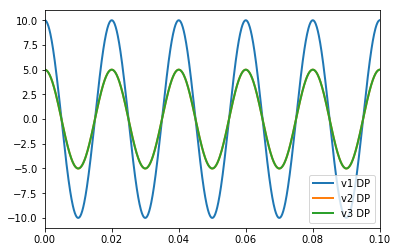

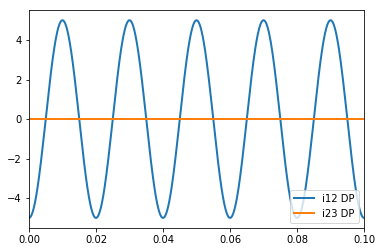

In [8]:
#v1 = 'v1'
#v2 = 'v2'
#v3 = 'v3'
#i12 = 'i12'
#i23 = 'i23'
v1 = 'n1.v'
v2 = 'n2.v'
v3 = 'n3.v'
i12 = 'r1.i_intf'
i23 = 'r3.i_intf'

pt.set_timeseries_labels(ts_dpsim_dp_emt[v1], 'v1 DP')
pt.set_timeseries_labels(ts_dpsim_dp_emt[v2], 'v2 DP')
pt.set_timeseries_labels(ts_dpsim_dp_emt[v3], 'v3 DP')
pt.set_timeseries_labels(ts_dpsim_dp_emt[i12], 'i12 DP')
pt.set_timeseries_labels(ts_dpsim_dp_emt[i23], 'i23 DP')
pt.plot_timeseries(1, ts_dpsim_dp_emt[v1])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v2])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v3])
pt.plot_timeseries(2, ts_dpsim_dp_emt[i12])
pt.plot_timeseries(2, ts_dpsim_dp_emt[i23])

## Simulink reference results

In [9]:
# read Simulink log file
dpsim_dir = '../../../'
work_dir = dpsim_dir + 'build/reference-results/src/reference-results/Simulink/Circuits/'
log_name = 'SL_VS_CS_R4'
print(work_dir + log_name + '.csv')

ts_sl = rt.read_timeseries_simulink(work_dir + log_name + '.csv')

../../../build/reference-results/src/reference-results/Simulink/Circuits/SL_VS_CS_R4.csv
column number: 5
results length: 1001
real column names: ['v1', 'v2', 'v3', 'i12', 'i23']
complex column names: []


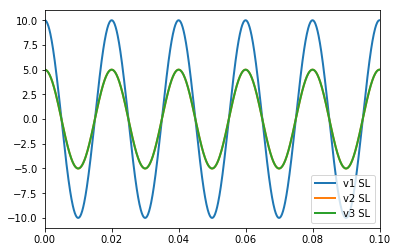

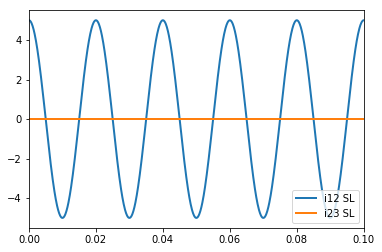

In [10]:
pt.set_timeseries_labels(ts_sl['v1'], 'v1 SL')
pt.set_timeseries_labels(ts_sl['v2'], 'v2 SL')
pt.set_timeseries_labels(ts_sl['v3'], 'v3 SL')
pt.set_timeseries_labels(ts_sl['i12'], 'i12 SL')
pt.set_timeseries_labels(ts_sl['i23'], 'i23 SL')
pt.plot_timeseries(1, ts_sl['v1'])
pt.plot_timeseries(1, ts_sl['v2'])
pt.plot_timeseries(1, ts_sl['v3'])
pt.plot_timeseries(2, ts_sl['i12'])
pt.plot_timeseries(2, ts_sl['i23'])

## Comparison

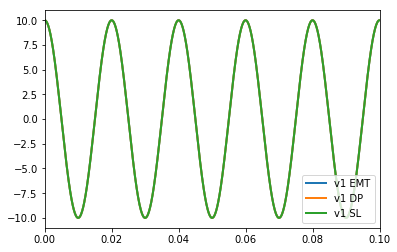

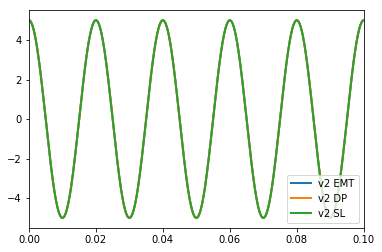

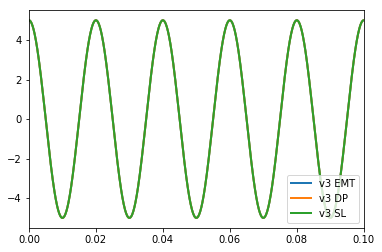

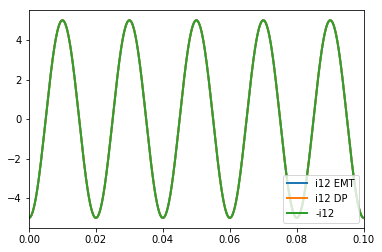

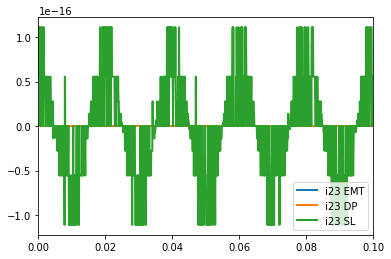

In [11]:
v1 = 'n1.v'
v2 = 'n2.v'
v3 = 'n3.v'
i12 = 'r1.i_intf'
i23 = 'r3.i_intf'

# plot v1
pt.plot_timeseries(1, ts_dpsim_emt[v1])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v1])
pt.plot_timeseries(1, ts_sl['v1'])
# plot v2
pt.plot_timeseries(2, ts_dpsim_emt[v2])
pt.plot_timeseries(2, ts_dpsim_dp_emt[v2])
pt.plot_timeseries(2, ts_sl['v2'])
# plot v3
pt.plot_timeseries(3, ts_dpsim_emt[v3])
pt.plot_timeseries(3, ts_dpsim_dp_emt[v3])
pt.plot_timeseries(3, ts_sl['v3'])
# plot i12
pt.plot_timeseries(4, ts_dpsim_emt[i12])
pt.plot_timeseries(4, ts_dpsim_dp_emt[i12])
pt.plot_timeseries(4, ts_sl['i12'].scale('-i12', -1))
# plot i34
pt.plot_timeseries(5, ts_dpsim_emt[i23])
pt.plot_timeseries(5, ts_dpsim_dp_emt[i23])
pt.plot_timeseries(5, ts_sl['i23'])

In [12]:
v1 = 'n1.v'
v2 = 'n2.v'
v3 = 'n3.v'
i12 = 'r1.i_intf'
i23 = 'r3.i_intf'

# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += ts.rmse(ts_sl['v1'], ts_dpsim_emt[v1])
err_sl_emt += ts.rmse(ts_sl['v2'], ts_dpsim_emt[v2])
err_sl_emt += ts.rmse(ts_sl['v3'], ts_dpsim_emt[v3])
err_sl_emt = err_sl_emt / 3
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += ts.rmse(ts_sl['v1'], ts_dpsim_dp_emt[v1])
err_sl_dp += ts.rmse(ts_sl['v2'], ts_dpsim_dp_emt[v2])
err_sl_dp += ts.rmse(ts_sl['v3'], ts_dpsim_dp_emt[v3])
err_sl_dp = err_sl_dp / 3
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

Total RMSE of Simulink reference and DPsim EMT: 0.000102592
Total RMSE of Simulink reference and DPsim DP: 0.0001026
